In [129]:
# requirements

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from IPython.display import display, Markdown, Latex
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit

# PW 6 - Strom und Spannungsquellen

1.	Grundlagen Experiment Solarzellen als Gleichstromquelle

Die Solarzelle fungiert in einem Stromkreis als Gleichstromquelle. Dabei hängt sie wie zu erwarten von verschiedenen elektrotechnischen Eigenschaften des Aufbaus ab, welche im Folgenden näher analysiert werden sollen.
Durch die auf die Solarzelle einfallende Intensität eines Lichtstrahls kommt es zu einem zur Intensität proportionalen Strom I;L, welcher unabhängig vom angeschlossenen Verbraucher ist. Die Klemmspannung U;ext ergibt sich aus 
U;ext=R;L * I;ext
Wobei R;L der Lastwiderstand ist und I;ext = I;L – I;D die Differenz des insgesamt erzeugten Stroms und dem innerhalb der Zelle fließenden Strom beschreibt, also beschreibt I;ext den im äußeren Stromkreis vorhandenen Strom.
Durch experimentelle Messungen kommt man zu Relationen der eingangs erwähnter elektrotechnischer Eigenschaften:
Trägt man die gemessene Stromstärke I;ext in Äbhängigkeit von U;ext in einem Diagramm auf, sieht man, dass für kleine Klemmspannungen der fließende Strom annähernd konsntant ist, bis er an einem gewissen Punkt rapide gegen 0 geht. Die erhaltene Abbildung wird als Strom-Spannungskennlinie bezeichnet. In diesem Experiment wird das für zwei verschiedene Lichtintensitäten durchgeführt. Aus dem Diagramm lassen sich auch durch Extrapolation zu den Koordinatenachsen der Kurzschlussstrom I;KS für eine gegen Null gehende Klemmspannung U;ext und die Leerlaufspannung U;LL für sehr große Widerstände, und damit I;ext = 0, ermitteln.
Aus den beiden ermittelten Größen I;ext und U;ext lassen sich nun auch die Leistung  P;ext = U;ext * I;ext und der Lastwiderstand R;L = U;ext / I;ext bestimmen. Trägt man diese wieder in einem Diagramm auf lässt sich die maximal mögliche Leistung beider Lichtintensitäten in Abhängigkeit von dem Lastwiderstand ermitteln.
Der Kürvenfüllfaktor CFF beschreibt, wie abrupt, also wie „rechteckig“, der Verlauf der Strom-Spannungskennlinie aussieht und wird mittels CFF = P;max / (I;KS * U;LL) bestimmt.


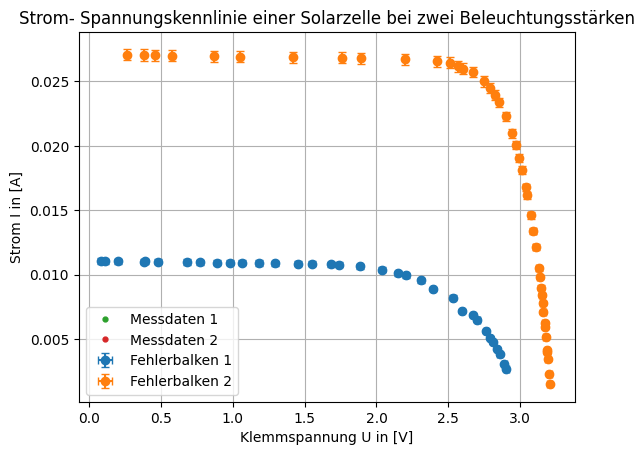

I_KS_1 = (0,011 +/- 0.001) A
I_KS_2 = (0,027 +/- 0,001) A
U_LL_1 = (3,05 +/- 0,1) V
U_LL_2 = (3,3 +/- 0,1) V
Der Kurvenfüllfaktor der ersten Beluchtungsstärke beträgt 0.66+/-0.06.
Der Kurvenfüllfaktor der zweiten Beleuchtungsstärke beträgt 0.77+/-0.04.


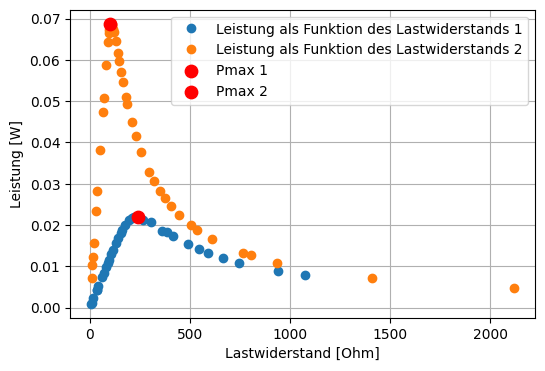

In [130]:
# 1.1 
#messen U, konstanter Widerstand R, daraus I berechenen

R = ufloat(489, 6) #in mOhm


U_1_werte = np.array([2.904, 2.89, 2.857, 2.837, 2.812, 2.791, 2.762, 2.703, 2.67, 2.592, 2.53, 2.394, 2.308, 2.206, 2.148, 2.037, 1.888, 1.738, 1.684, 1.55, 1.451, 1.291, 1.184, 1.067, 0.983, 0.893, 0.775, 0.684, 0.483, 0.384, 0.39, 0.2014, 0.0863, 0.1087])
u_U_1 = np.where(U_1_werte >= 0.4, (U_1_werte * 0.005)+0.001, (U_1_werte * 0.008)+0.00003)
U_1 = unp.uarray(U_1_werte, u_U_1) #in v
U_1_nom = U_1_werte
U_für_I_1_werte = np.array([1.32, 1.5, 1.87, 2.08, 2.32, 2.5, 2.74, 3.16, 3.36, 3.52, 4.02, 4.35, 4.67, 4.86, 4.95, 5.08, 5.2, 5.26, 5.28, 5.3, 5.31, 5.32,5.33, 5.34, 5.35, 5.35, 5.36, 5.37, 5.38, 5.38, 5.39, 5.4, 5.41, 5.4]) #in mv
u_U_für_I_1 = np.array((U_für_I_1_werte * 0.008)+0.03)
U_für_I_1 = unp.uarray(U_für_I_1_werte, u_U_für_I_1)
I_1 = U_für_I_1 / R # millivolt durch milliohm = volt durch ohm
u_I_1 = unp.std_devs(I_1) 
I_1_nom = unp.nominal_values(I_1)

U_2_werte = np.array([0.2663, 0.3795, 0.458, 0.58, 0.872, 1.049, 1.418, 1.762, 1.892, 2.201, 2.419, 2.51, 2.565, 2.601, 2.67, 2.748, 2.788, 2.822, 2.852, 2.899, 2.942, 2.968, 2.992, 3.013, 3.038, 3.049, 3.074,3.092, 3.109, 3.128, 3.135, 3.145, 3.150, 3.156, 3.162, 3.170, 3.173, 3.179, 3.187, 3.189, 3.193, 3.201, 3.206]) #in v
u_U_2 = np.where(U_2_werte >= 0.458, (U_2_werte * 0.005)+0.001, (U_2_werte * 0.008)+0.00003)
U_2 = unp.uarray(U_2_werte, u_U_2) 
U_2_nom = U_2_werte
U_für_I_2_werte = np.array([13.25, 13.23, 13.22, 13.21, 13.19, 13.17, 13.15, 13.12, 13.11, 13.07, 12.99, 12.94, 12.8, 12.71, 12.59, 12.23, 11.99, 11.71, 11.43, 10.9, 10.26, 9.82, 9.32, 8.85, 8.21, 7.9, 7.14, 6.56, 5.93, 5.13, 4.8, 4.4, 4.11, 3.82, 3.48, 3.07, 2.89, 2.54, 2.03, 1.94, 1.67, 1.11, 0.74]) #in mv
u_U_für_I_2 = np.array((U_für_I_2_werte * 0.008)+0.03)
U_für_I_2 = unp.uarray(U_für_I_2_werte, u_U_für_I_2)
I_2 = U_für_I_2 / R # millivolt durch milliohm = volt durch ohm
u_I_2 = unp.std_devs(I_2) 
I_2_nom = unp.nominal_values(I_2)


plt.figure()
plt.errorbar(U_1_nom, I_1_nom, xerr=u_U_1, yerr=u_I_1, fmt='o', capsize=3, label="Fehlerbalken 1", zorder=10); 
plt.errorbar(U_2_nom, I_2_nom, xerr=u_U_2, yerr=u_I_2, fmt='o', capsize=3, label="Fehlerbalken 2", zorder=10); 
plt.plot(U_1_nom, I_1_nom, 'o', markersize=3.5, label="Messdaten 1", zorder=10)
plt.plot(U_2_nom, I_2_nom, 'o', markersize=3.5, label="Messdaten 2", zorder=10)
plt.xlabel("Klemmspannung U in [V]")
plt.ylabel("Strom I in [A]")
plt.title("Strom- Spannungskennlinie einer Solarzelle bei zwei Beleuchtungsstärken")
plt.legend()
plt.grid(True)
plt.show()

I_ks_1 = ufloat(0.011, 0.001)
I_ks_2 = ufloat(0.027, 0.001)
U_ll_1 = ufloat(3.05, 0.1)
U_ll_2 = ufloat(3.3, 0.1)

print("I_KS_1 = (0,011 +/- 0.001) A") # ablesen
print("I_KS_2 = (0,027 +/- 0,001) A")
print("U_LL_1 = (3,05 +/- 0,1) V")
print("U_LL_2 = (3,3 +/- 0,1) V")

P_ext_1 = U_1 * I_1 
P_ext_1_nom = unp.nominal_values(P_ext_1)
P_ext_2 = U_2 * I_2 
P_ext_2_nom = unp.nominal_values(P_ext_2)

R_L_1 = U_1 / I_1
R_L_1_nom = unp.nominal_values(R_L_1)
R_L_2 = U_2 / I_2
R_L_2_nom = unp.nominal_values(R_L_2)

# maximum definieren
idx_max_1 = np.argmax(P_ext_1_nom)
P_max_1 = P_ext_1_nom[idx_max_1]
idx_max_2 = np.argmax(P_ext_2_nom)
P_max_2 = P_ext_2_nom[idx_max_2]

# plot erstellen
plt.figure(figsize=(6,4))
plt.plot(R_L_1_nom, P_ext_1_nom, 'o', label ='Leistung als Funktion des Lastwiderstands 1')
plt.plot(R_L_2_nom, P_ext_2_nom, 'o', label ='Leistung als Funktion des Lastwiderstands 2')
plt.xlabel("Lastwiderstand [Ohm]")
plt.ylabel("Leistung [W]")
plt.scatter(R_L_1_nom[np.argmax(P_ext_1_nom)], max(P_ext_1_nom), 
            color='red', s=80, label='Pmax 1', zorder=3)
plt.scatter(R_L_2_nom[np.argmax(P_ext_2_nom)], max(P_ext_2_nom), 
            color='red', s=80, label='Pmax 2', zorder=3)
 #plt.scatter(P_max_1, P_max_2, color='red', label='Pmax', zorder=3)
plt.legend()
plt.grid(True)
plt.show


P_max_1_ = 1 #ablesen
R_L_P_max_1 = 1
P_max_2_ = 1
R_L_P_max_2 = 1

cff_1 = P_max_1 / (I_ks_1 * U_ll_1)
cff_2 = P_max_2 / (I_ks_2 * U_ll_2)

print(f"Der Kurvenfüllfaktor der ersten Beluchtungsstärke beträgt {cff_1}.")
print(f"Der Kurvenfüllfaktor der zweiten Beleuchtungsstärke beträgt {cff_2}.")

2. Grundlagen Experiment Reale Spannungsquelle

Nun wird eine sogenannte „Reale“ Spannungsquelle betrachtet, welche an Spannung mit zunehmender Stromstärke abnimmt. Um diese Erscheinung zu beschreiben, geht man von einem Innenwiderstand R;i aus, der in Serie zu einer idealen Spannungsquelle liegt, die ihre Spannung, unabhängig von der Stromstärke, nicht ändert. Fließt nun Strom, fällt am Innenwiderstand R;i eine Spannung ab, die die außen anliegende Klemmspannung verkleinert. 
Die Spannung einer idealen Batterie soll als U;0 und Quellenspannung bezeichnet werden, die im äußeren messbare Spannung U;KL heißt Klemmspannung. Nach dem Ohm´schen Gesetz ergibt sich ein Stromfluss von I = U;0 / (R;i + R;L) wobei R;L den Lastwiderstand beschreibt. Für die Klemmspannung gilt nun folgende Relation:          U;KL = U;0 – I * R;i. Durch Messung von U;KL und I lässt sich erneut eine Strom-Spanungskennlinie in einem Diagramm darstellen. Dieser Verlauf ist nun annähernd linear und mittels eines linearen Fits ist die Steigung der Gerade R;i und der intercept mit der y-Achse U;0 herauszufinden.



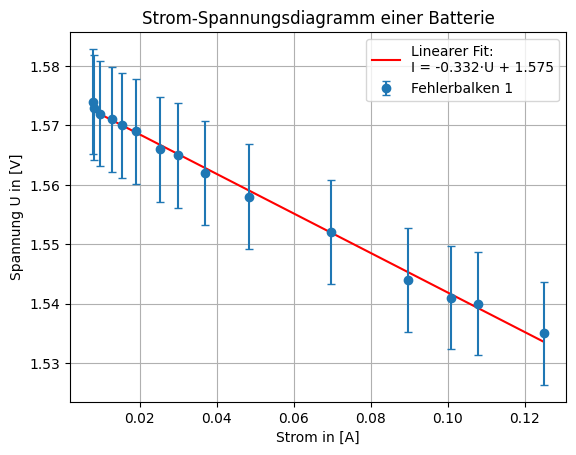

Innenwiderstand = 0.3324 ± 0.0574 Ohm
Quellenspannung U_0 = 1.5751 ± 0.0036 V


In [131]:
# 2


U_messwerte = np.array([1.574, 1.573, 1.572, 1.571, 1.570, 1.569, 1.566, 1.565, 1.562, 1.558, 1.552, 1.544, 1.541, 1.540, 1.535]) #V
u_u_b = np.array((U_messwerte * 0.005)+0.001) # unsicherheit batterie spannung in V
U_batterie = unp.uarray(U_messwerte, u_u_b)
I_messwerte = np.array([7.78, 8.19, 9.69, 12.86, 15.35, 19.10, 25.17, 29.96, 36.96, 48.4, 69.8, 89.6, 100.8, 107.9, 124.9])/1000 #mA 
u_i_b = np.where(I_messwerte <= 40, (I_messwerte *0.012)+0.03, (I_messwerte * 0.012)+0.3) # unsicherheit batterie strom
I_batterie = unp.uarray(I_messwerte, u_i_b)

# Linearer Fit: y = m*x + b
m, b = np.polyfit(I_messwerte, U_messwerte, 1)

def line(x, m, b):
    return m * x + b

# Werte für Fitlinie erzeugen
x_fit = np.linspace(min(I_messwerte), max(I_messwerte), 100)
y_fit = m * x_fit + b

x = np.array(I_messwerte)
y = np.array(U_messwerte)
y_err = np.array(u_u_b)

# Fit mit Unsicherheiten
popt, pcov = curve_fit(line, x, y, sigma=y_err, absolute_sigma=True)

# Fit-Parameter
m, b = popt

# Unsicherheiten aus der Kovarianzmatrix
m_err, b_err = np.sqrt(np.diag(pcov))

# plot
plt.figure()
plt.errorbar(I_messwerte, U_messwerte, yerr=u_u_b, fmt='o', capsize=3, label="Fehlerbalken 1", zorder=10); #xerr=u_i_b,
plt.plot(x_fit, y_fit, 'r-', label=f"Linearer Fit:\nI = {m:.3f}·U + {b:.3f}", zorder=5)
plt.xlabel("Strom in [A]")
plt.ylabel("Spannung U in [V]")
plt.title("Strom-Spannungsdiagramm einer Batterie")
plt.legend()
plt.grid(True)
plt.show()

print(f"Innenwiderstand = {-m:.4f} ± {m_err:.4f} Ohm")
print(f"Quellenspannung U_0 = {b:.4f} ± {b_err:.4f} V") # 1.577 V


3. Diskussion

Im ersten Experiment gibt es in der Strom-Spannungskennlinie bei der Messung mit mehr Abstand zur Lichtquelle einen leichten Ausreißer, der vermutlich daher kommt, dass er später hinzugefügt wurde und dabei der originale Aufbau nicht exakt reproduziert werden konnte. Der CFF erscheint realistisch, da er bei sehr guten Solarzellen zwischen 0,8 und 0,9 liegt. 
Der Schnittpunkt des Fits mit der y-Achse entspricht etwa dem angfangs gemessenen Wert der Quellspannung von etwa 1,577 Volt. 